# House Price Prediction EDA

### Due to the large number of independent variables, I will be focusing on ones with seemingly high importance, unique characteristics and relevance/irrelevance. The high dimensionality of this dataset will be more properly handeled in the pre-processing phase.

In [1]:
#Importing relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from datetime import datetime, date
import numpy as np
from numpy import mean
from numpy import std
from library.sb_utils import save_file
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv("Data Files/train_data_cleaned_V2.csv")

In [3]:
#Setting the first column as our dependent variable.
first_column = data.pop('SalePrice')

In [4]:
data.insert(0, 'SalePrice', first_column)

In [5]:
data.shape

(1137, 79)

In [6]:
#Checking data types of our variables, we can see there are a large number of categorical and discrete variables
#in addition to a number of continuous ones.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1137 non-null   int64  
 1   LotFrontage    1137 non-null   float64
 2   LotArea        1137 non-null   int64  
 3   MasVnrArea     1137 non-null   float64
 4   BsmtFinSF1     1137 non-null   int64  
 5   BsmtFinSF2     1137 non-null   int64  
 6   BsmtUnfSF      1137 non-null   int64  
 7   TotalBsmtSF    1137 non-null   int64  
 8   1stFlrSF       1137 non-null   int64  
 9   2ndFlrSF       1137 non-null   int64  
 10  LowQualFinSF   1137 non-null   int64  
 11  GrLivArea      1137 non-null   int64  
 12  BsmtFullBath   1137 non-null   int64  
 13  BsmtHalfBath   1137 non-null   int64  
 14  FullBath       1137 non-null   int64  
 15  HalfBath       1137 non-null   int64  
 16  BedroomAbvGr   1137 non-null   int64  
 17  KitchenAbvGr   1137 non-null   int64  
 18  TotRmsAb

(array([  8.,  18.,  77., 142., 211., 165., 158., 103.,  72.,  57.,  37.,
         28.,  13.,  24.,   8.,   8.,   4.,   1.,   2.,   1.]),
 array([ 35311.  ,  56795.45,  78279.9 ,  99764.35, 121248.8 , 142733.25,
        164217.7 , 185702.15, 207186.6 , 228671.05, 250155.5 , 271639.95,
        293124.4 , 314608.85, 336093.3 , 357577.75, 379062.2 , 400546.65,
        422031.1 , 443515.55, 465000.  ]),
 <BarContainer object of 20 artists>)

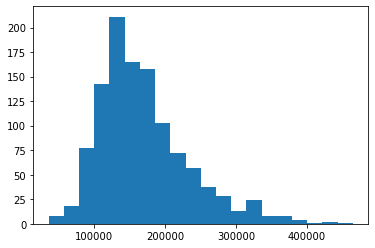

In [7]:
plt.hist(data['SalePrice'], bins=20)

### Assessing Categorical Variables

In [8]:
#Should data be grouped by or summarized by neighborhood?
neighborhood_price_means = data.groupby('Neighborhood')[['SalePrice']].mean()
print(neighborhood_price_means)

                  SalePrice
Neighborhood               
Blmngtn       194870.882353
Blueste       124000.000000
BrDale        104493.750000
BrkSide       116451.111111
ClearCr       195786.000000
CollgCr       195223.159420
Crawfor       194123.147059
Edwards       124650.000000
Gilbert       189072.342466
IDOTRR         98931.200000
MeadowV        92693.333333
Mitchel       151525.609756
NAmes         139974.813953
NPkVill       143031.250000
NWAmes        178477.019231
NoRidge       276520.000000
NridgHt       283713.296296
OldTown       114539.620253
SWISU         132984.571429
Sawyer        134857.524590
SawyerW       175587.804348
Somerst       221806.540541
StoneBr       274126.928571
Timber        239784.586207
Veenker       202333.333333


<AxesSubplot:title={'center':'Average Home Sale Price by Neighborhood'}, ylabel='Neighborhood'>

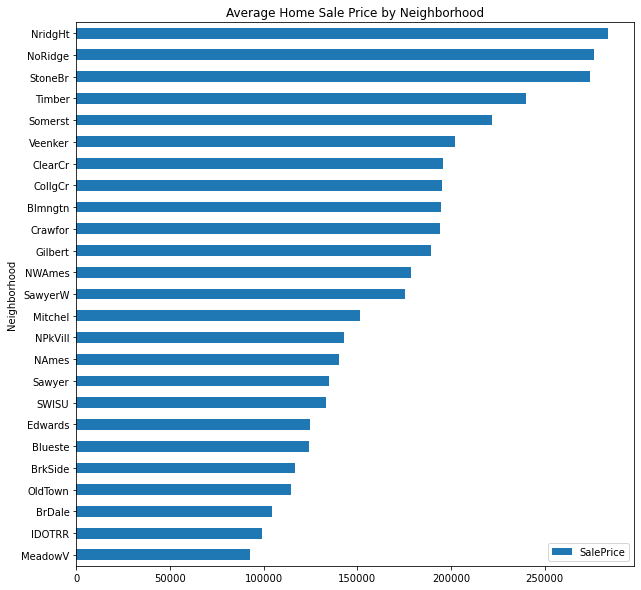

In [9]:
(neighborhood_price_means.sort_values(by='SalePrice')).plot(kind='barh',figsize=(10,10), 
                                                            title='Average Home Sale Price by Neighborhood')

There is clearly a correlation between neighborhood and sale price

In [10]:
#Creating a seperate dataframe for categorical variables
data_cat = data.select_dtypes(include='object').copy().join(data[{'MSSubClass', 'OverallQual', 'OverallCond','SalePrice'}])

In [11]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1137 non-null   object
 1   Street         1137 non-null   object
 2   Alley          67 non-null     object
 3   LotShape       1137 non-null   object
 4   LandContour    1137 non-null   object
 5   Utilities      1137 non-null   object
 6   LotConfig      1137 non-null   object
 7   LandSlope      1137 non-null   object
 8   Neighborhood   1137 non-null   object
 9   Condition1     1137 non-null   object
 10  Condition2     1137 non-null   object
 11  BldgType       1137 non-null   object
 12  HouseStyle     1137 non-null   object
 13  RoofStyle      1137 non-null   object
 14  RoofMatl       1137 non-null   object
 15  Exterior1st    1137 non-null   object
 16  Exterior2nd    1137 non-null   object
 17  MasVnrType     1130 non-null   object
 18  ExterQual      1137 non-null

In [12]:
def stripplots(column):
    sns.catplot(x=column, y='SalePrice', kind="strip", data=data_cat)

In [13]:
def swarmplots(column):
    sns.catplot(x=column, y='SalePrice', kind="swarm", data=data_cat)

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

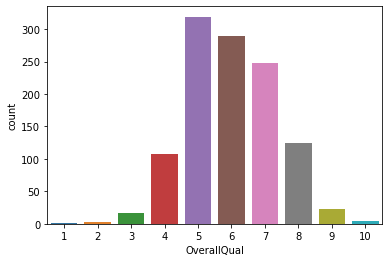

In [14]:
sns.countplot(data=data_cat, x='OverallQual')

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

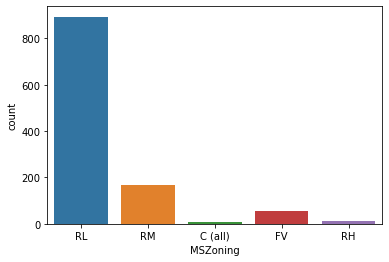

In [15]:
#Zoning countplot shows almost all observations are residential, with a majority being low-density
sns.countplot(data=data_cat, x='MSZoning')

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

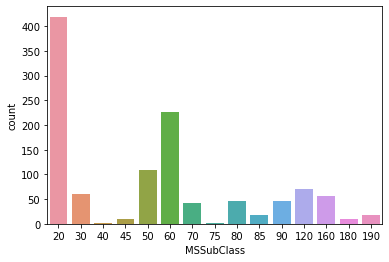

In [16]:
#Integer values given to generally classify dwelling types (ex: '1-STORY 1945 & OLDER')
sns.countplot(x='MSSubClass', data=data)

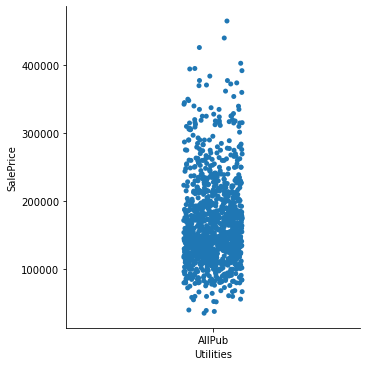

In [17]:
stripplots('Utilities')

In [18]:
#There is only one instance of the NoSeWa utilities being used, so we can remove this column from our dataset
del data['Utilities']
del data_cat['Utilities']

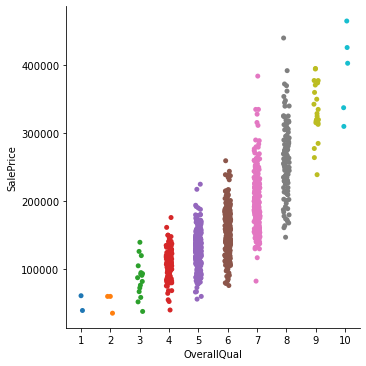

In [19]:
#Quality of the entire dwelling, subjective but also seems to have high correlation with sale price, perhaps semi-log relation
stripplots('OverallQual')

[None]

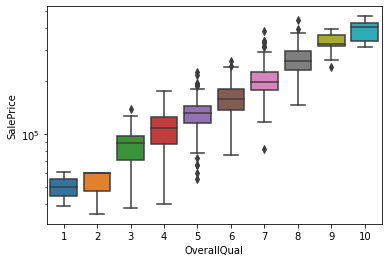

In [20]:
#semi-log boxplot of OverallQual
sns.boxplot(x='OverallQual', y='SalePrice', data=data).set(yscale="log")

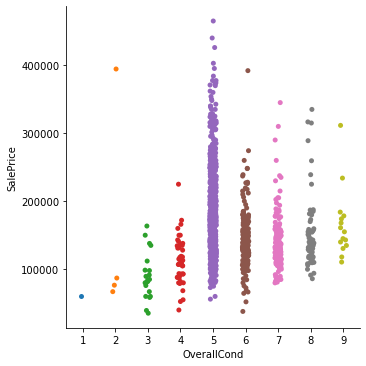

In [21]:
stripplots("OverallCond")

There are a number of attributes attributed to feature qualities and conditions

There are many other similar quality attributes, are they necessary, do any have a stronger correlation or can they be omitted? 

###  Principle Component Analysis (PCA)

#### Visualization of high dimensional data

There are many other similar quality attributes, are they necessary, do any have a stronger correlation or can they be omitted? Possible PCA analysis groupings: Condition/quality (of home/garage/basement/interior vs exterior etc.), number of rooms/bath rooms, exterior/lot factors and proximities (street style, driveway, proximity to train tracks, etc.), home/lot style and sublasses/zonings/neighborhood, stylistic features (roof/exterior type/material/style, etc.)

HOW TO HANDLE HIGH DIMENSIONAL CATEGORICAL DATA

## Assessing Continuous/Numerical Variables

In [22]:
data_num = data.select_dtypes(include=['int64','float64']).copy()
data_num = data_num.drop(columns=['MSSubClass','OverallQual','OverallCond'])

In [23]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1137 non-null   int64  
 1   LotFrontage    1137 non-null   float64
 2   LotArea        1137 non-null   int64  
 3   MasVnrArea     1137 non-null   float64
 4   BsmtFinSF1     1137 non-null   int64  
 5   BsmtFinSF2     1137 non-null   int64  
 6   BsmtUnfSF      1137 non-null   int64  
 7   TotalBsmtSF    1137 non-null   int64  
 8   1stFlrSF       1137 non-null   int64  
 9   2ndFlrSF       1137 non-null   int64  
 10  LowQualFinSF   1137 non-null   int64  
 11  GrLivArea      1137 non-null   int64  
 12  BsmtFullBath   1137 non-null   int64  
 13  BsmtHalfBath   1137 non-null   int64  
 14  FullBath       1137 non-null   int64  
 15  HalfBath       1137 non-null   int64  
 16  BedroomAbvGr   1137 non-null   int64  
 17  KitchenAbvGr   1137 non-null   int64  
 18  TotRmsAb

In [24]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1137.0,169524.571680,64152.208863,35311.0,127000.0,155835.0,199900.0,465000.0
LotFrontage,1137.0,56.259455,31.245879,0.0,43.0,62.0,76.0,153.0
LotArea,1137.0,9296.226913,3889.441844,1300.0,7200.0,9100.0,11000.0,36500.0
MasVnrArea,1137.0,80.530343,130.061731,0.0,0.0,0.0,135.0,630.0
BsmtFinSF1,1137.0,423.452067,414.247374,0.0,0.0,384.0,695.0,1646.0
BsmtFinSF2,1137.0,21.046614,82.616363,0.0,0.0,0.0,0.0,532.0
BsmtUnfSF,1137.0,560.302551,425.802252,0.0,221.0,476.0,801.0,1869.0
TotalBsmtSF,1137.0,1004.801231,378.600982,0.0,780.0,953.0,1232.0,2136.0
1stFlrSF,1137.0,1104.442392,329.492638,334.0,861.0,1044.0,1314.0,2136.0
2ndFlrSF,1137.0,315.208443,400.866813,0.0,0.0,0.0,689.0,1427.0


Noteworthy takeaways: total rooms has a max value of 14, 

### PCA for numerical variables

All data values are homogenous with regards to square footage (SF), except for LotFrontage, which is in units of linear feet, MiscVal which is a dollar amount and the three related to age (House_Age, Remod_Age and Garage_Age). 
We will attempt to scale the data and perform PCA on the results

#### Scale the data

In [25]:
data_num.head()

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age_of_sale,House_Age,Remod_Age,Garage_Age
0,208500,65.0,8450,196.0,706,0,150,856,856,854,...,61,0,0,0,0,0,4940,18,0,18.0
1,181500,80.0,9600,0.0,978,0,284,1262,1262,0,...,0,0,0,0,0,0,5216,45,0,45.0
2,223500,68.0,11250,162.0,486,0,434,920,920,866,...,42,0,0,0,0,0,4727,20,19,20.0
3,250000,84.0,14260,350.0,655,0,490,1145,1145,1053,...,84,0,0,0,0,0,4636,21,0,21.0
4,307000,75.0,10084,186.0,1369,0,317,1686,1694,0,...,57,0,0,0,0,0,5124,17,16,17.0


Data already has a numerical index.

In [26]:
data_num_columns = data_num.columns

In [27]:
data_num_scale = scale(data_num)

In [28]:
data_num_scale_df = pd.DataFrame(data_num_scale, columns=data_num_columns).drop(columns=['SalePrice'])

In [29]:
data_num_scale_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age_of_sale,House_Age,Remod_Age,Garage_Age
0,0.279857,-0.217666,0.888197,0.682376,-0.254863,-0.964023,-0.393202,-0.754347,1.344658,-0.058672,...,0.436367,-0.336731,-0.035773,-0.198419,-0.041905,-0.154713,0.128656,-1.024963,-0.672344,-0.821371
1,0.760132,0.078136,-0.619443,1.339277,-0.254863,-0.649184,0.679639,0.478393,-0.786663,-0.058672,...,-0.768407,-0.336731,-0.035773,-0.198419,-0.041905,-0.154713,0.701140,-0.106294,-0.672344,0.219722
2,0.375912,0.502548,0.626668,0.151058,-0.254863,-0.296753,-0.224084,-0.560023,1.374606,-0.058672,...,0.061110,-0.336731,-0.035773,-0.198419,-0.041905,-0.154713,-0.313152,-0.956913,0.149139,-0.744253
3,0.888205,1.276779,2.072771,0.559207,-0.254863,-0.165179,0.370470,0.123145,1.841300,-0.058672,...,0.890627,-0.336731,-0.035773,-0.198419,-0.041905,-0.154713,-0.501906,-0.922889,-0.672344,-0.705694
4,0.600040,0.202631,0.811277,2.283573,-0.254863,-0.571649,1.800044,1.790077,-0.786663,-0.058672,...,0.357366,-0.336731,-0.035773,-0.198419,-0.041905,-0.154713,0.510312,-1.058988,0.019431,-0.859930


#### Verifying the scaling

In [30]:
data_num_scale_df.mean()

LotFrontage      1.269384e-18
LotArea          3.358986e-17
MasVnrArea      -1.652152e-16
BsmtFinSF1      -1.874783e-17
BsmtFinSF2       6.952320e-17
BsmtUnfSF        4.564901e-17
TotalBsmtSF     -6.737501e-17
1stFlrSF         1.878689e-16
2ndFlrSF        -1.753703e-16
LowQualFinSF     3.382787e-16
GrLivArea       -1.165881e-16
BsmtFullBath    -5.468117e-17
BsmtHalfBath    -1.044313e-16
FullBath         5.370472e-17
HalfBath        -6.151632e-17
BedroomAbvGr    -2.359102e-16
KitchenAbvGr     4.166022e-16
TotRmsAbvGrd     4.315907e-17
Fireplaces      -1.163928e-16
GarageCars      -2.890290e-17
GarageArea       5.267945e-17
WoodDeckSF      -8.436523e-17
OpenPorchSF      5.429059e-17
EnclosedPorch    3.212519e-17
3SsnPorch        4.245602e-16
ScreenPorch     -1.179551e-16
PoolArea        -4.025291e-16
MiscVal         -1.555972e-16
Age_of_sale     -3.667544e-16
House_Age        8.441405e-17
Remod_Age       -9.764494e-17
Garage_Age       6.603239e-17
dtype: float64

In [31]:
data_num_scale_df.std(ddof=0)

LotFrontage      1.0
LotArea          1.0
MasVnrArea       1.0
BsmtFinSF1       1.0
BsmtFinSF2       1.0
BsmtUnfSF        1.0
TotalBsmtSF      1.0
1stFlrSF         1.0
2ndFlrSF         1.0
LowQualFinSF     1.0
GrLivArea        1.0
BsmtFullBath     1.0
BsmtHalfBath     1.0
FullBath         1.0
HalfBath         1.0
BedroomAbvGr     1.0
KitchenAbvGr     1.0
TotRmsAbvGrd     1.0
Fireplaces       1.0
GarageCars       1.0
GarageArea       1.0
WoodDeckSF       1.0
OpenPorchSF      1.0
EnclosedPorch    1.0
3SsnPorch        1.0
ScreenPorch      1.0
PoolArea         1.0
MiscVal          1.0
Age_of_sale      1.0
House_Age        1.0
Remod_Age        1.0
Garage_Age       1.0
dtype: float64

#### Calculate PCA transformation

In [32]:
num_pca = PCA().fit(data_num_scale)

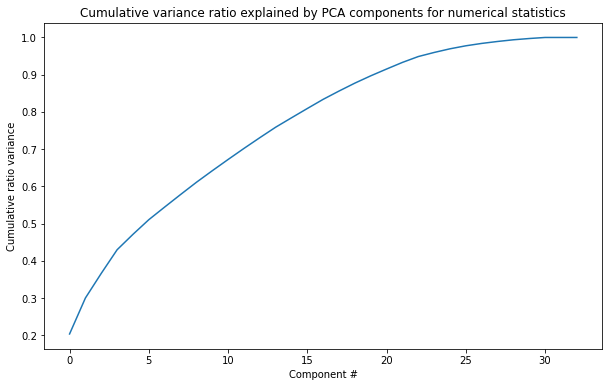

In [33]:
plt.subplots(figsize=(10, 6))
plt.plot(num_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for numerical statistics');

The first 12 compnents (50%) explain 80% of the variance.

In [34]:
num_pca_x = num_pca.transform(data_num_scale)

In [35]:
num_pca_x.shape

(1137, 33)

### PCA Visualization

In [36]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'SalePrice', data=data_num, alpha=0.5)
        ax.set(xlabel=col, ylabel='Sale Price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [37]:
num_features = [x for x in data_num.columns if x not in ['SalePrice']]

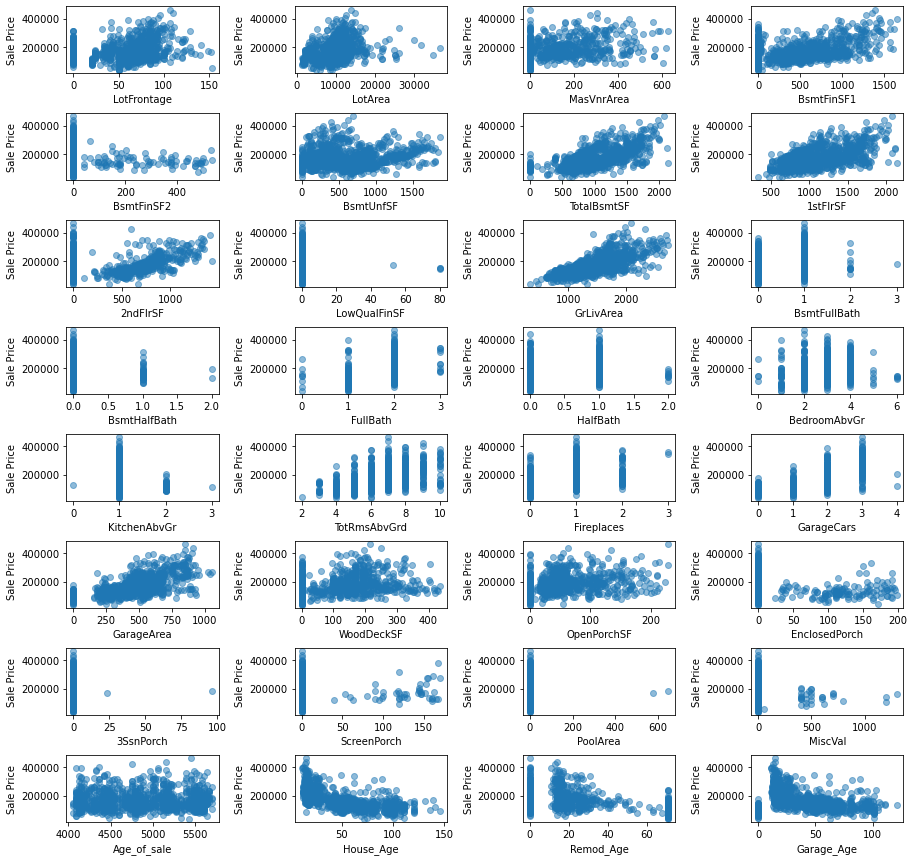

In [38]:
scatterplots(num_features, ncol=4, figsize=(15,15))

Seems DV's relationship to age-based variables is maybe logarithmic. Also worth noting is that extreme values of certain room attributes result in lower property values. Sales price declines with more than 1 half bathroom, 1 basement full bath, 4 above ground bedrooms, 1 above ground kitchen, 2 fireplaces, and 3 car garages. This relationship isn't entirely represented in TotRmsAbvGrd, however. Certain other intuitive relationships exist as well, such as finished versus unfished area. We would expect finished basements to generate more value, and the plots show that higher finished basement square footage lead to greater value than unfinished basements. A few interesting outliers seem to be present as well, such as the extreme value seen in BsmtFinSF1, 1stFlrSF as well as a house with 3 full baths in the basement and another (or the same) with 8 above ground bedrooms.

In [39]:
#The outlier for BedroomAbvGr is not the same as the BsmtFullBath
print(data_num[data_num['BedroomAbvGr']==8]['BsmtFullBath'])

Series([], Name: BsmtFullBath, dtype: int64)


In [40]:
# The outlier for BsmtFinSF1 IS the same house as the outlier for 1stFlrSF AND TotalBsmtSF, which makes sense
print(data_num[data_num['BsmtFinSF1']>4000][['1stFlrSF','TotalBsmtSF']])

Empty DataFrame
Columns: [1stFlrSF, TotalBsmtSF]
Index: []


Should these outliers be omitted?

The value of certain attributes don't necessarily indicate an increase in value, such as area of the different porch types or pool areas, but perhaps houses that have these attributes are worth more than ones that don't?

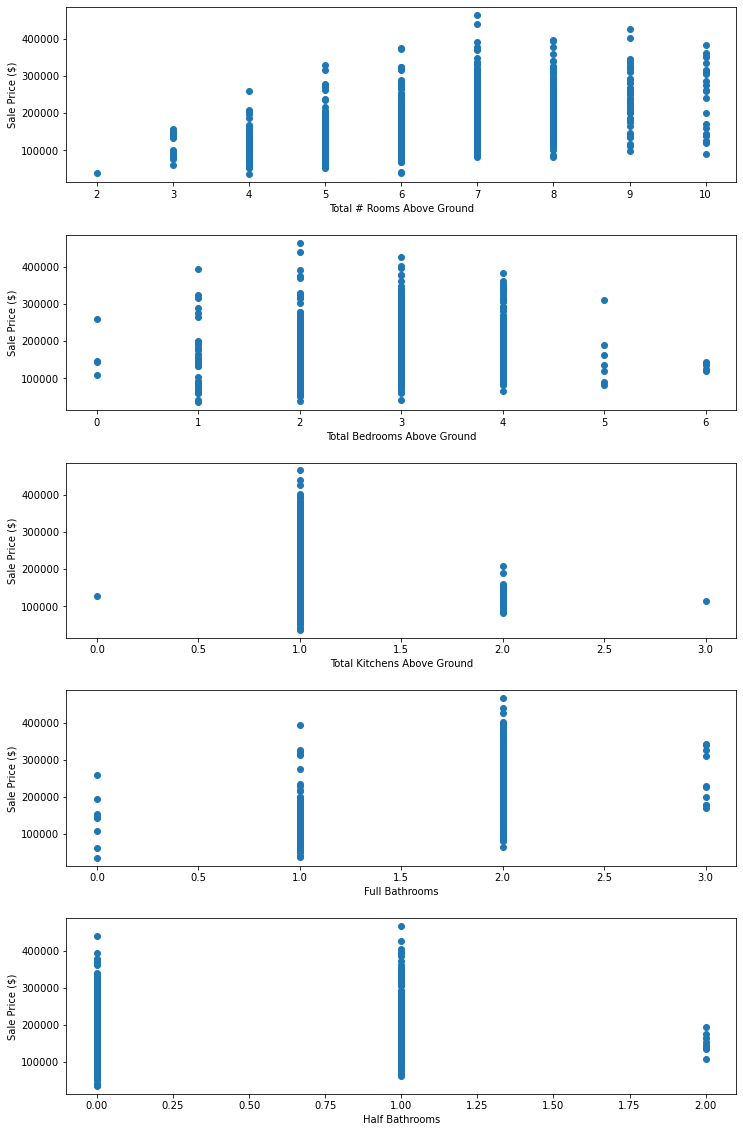

In [41]:
fig, ax = plt.subplots(5,1, sharey=True)
fig.set_size_inches([12,20])
fig.subplots_adjust(wspace=0.5, hspace=0.3)

ax[0].scatter(data_num['TotRmsAbvGrd'], data_num['SalePrice'])
ax[0].set_xlabel("Total # Rooms Above Ground")
ax[0].set_ylabel("Sale Price ($)")

ax[1].scatter(data_num['BedroomAbvGr'], data_num['SalePrice'])
ax[1].set_xlabel("Total Bedrooms Above Ground")
ax[1].set_ylabel("Sale Price ($)")

ax[2].scatter(data_num['KitchenAbvGr'], data_num['SalePrice'])
ax[2].set_xlabel("Total Kitchens Above Ground")
ax[2].set_ylabel("Sale Price ($)")

ax[3].scatter(data_num['FullBath'], data_num['SalePrice'])
ax[3].set_xlabel("Full Bathrooms")
ax[3].set_ylabel("Sale Price ($)")

ax[4].scatter(data_num['HalfBath'], data_num['SalePrice'])
ax[4].set_xlabel("Half Bathrooms")
ax[4].set_ylabel("Sale Price ($)")

plt.show()

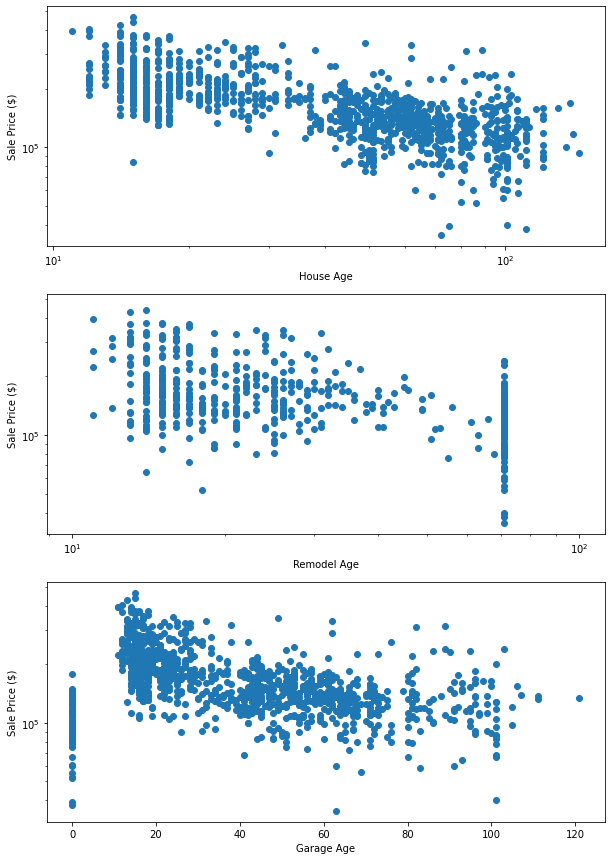

In [42]:
fig, ax = plt.subplots(3,1, sharey=True)
fig.set_size_inches([10,15])

ax[0].scatter(data_num['House_Age'], data_num['SalePrice'])
ax[0].set_xlabel("House Age")
ax[0].set_ylabel("Sale Price ($)")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

ax[1].scatter(data_num['Remod_Age'], data_num['SalePrice'])
ax[1].set_xlabel("Remodel Age")
ax[1].set_ylabel("Sale Price ($)")
ax[1].set_yscale("log")
ax[1].set_xscale("log")

ax[2].scatter(data_num['Garage_Age'], data_num['SalePrice'])
ax[2].set_xlabel("Garage Age")
ax[2].set_ylabel("Sale Price ($)")
ax[2].set_yscale("log")

plt.show()

We notice a log-log relationship between these age attributes and sale price. Garage Age has a large number of zero values for houses without garages, so it is plotted on a semi-log scale.

In [43]:
#Huge number of remodels occured in 1950? Should these be included?
data.Remod_Age.value_counts()

0     629
71    131
15     38
14     35
16     34
21     25
17     24
19     20
25     20
13     20
26     18
18     17
22     11
23     11
24      9
27      8
29      8
28      6
32      6
20      6
30      6
31      5
12      4
11      4
33      3
40      3
34      3
36      3
49      3
41      3
63      2
51      2
45      2
43      2
39      2
38      2
35      2
42      1
68      1
46      1
37      1
52      1
53      1
55      1
56      1
61      1
66      1
Name: Remod_Age, dtype: int64

 We also noticed a large, questionable number of remodels occuring 71 years ago, or in 1950. What is the significance of this and is it of concern?

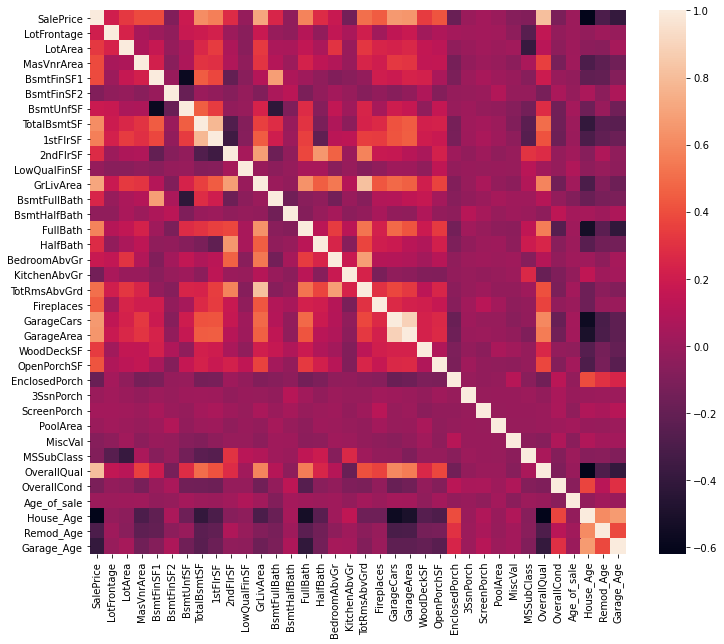

In [44]:
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr());

<AxesSubplot:>

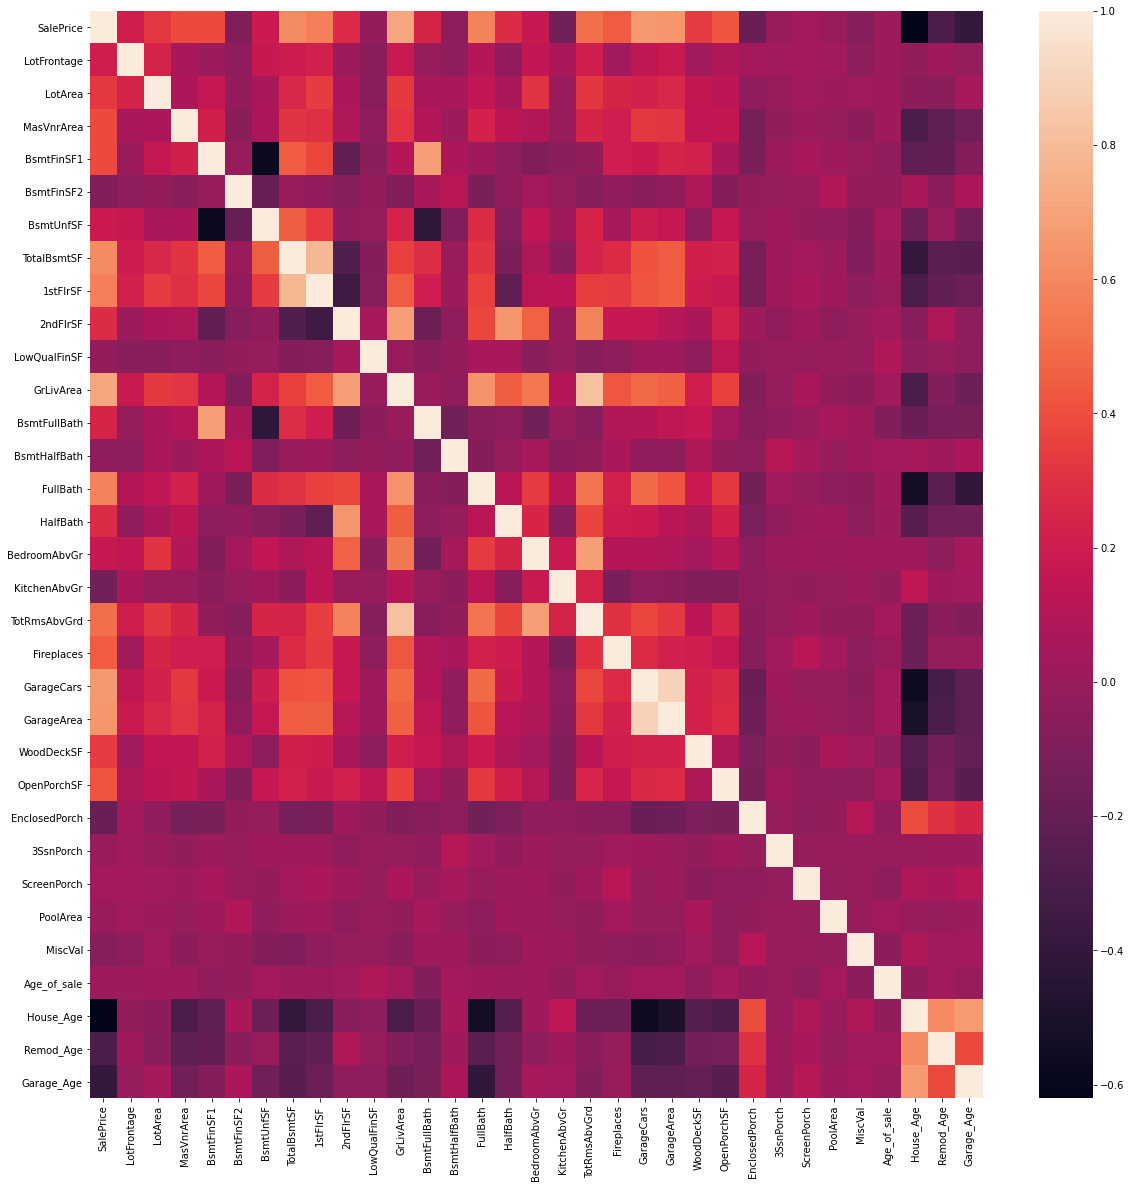

In [45]:
# Make a heatmap of the data 
plt.figure(figsize=(20,20))
sns.heatmap(data_num.corr())

Frome the heatmap we can see that LotArea, OverallQual, TotalBsmtSF, 1stFlrSF. 2ndFlrSF, GrLivArea, FullBath, HalfBath, TotRmsAbvGrd, Fireplaces, GarageCars, Garage Area, WoodDeckSF, OpenPorchSF, House_Age and Remod_Age have the strongest correlations to SalePrice

Should Square Footage areas be grouped, i.e.: Total house SF, basement SF, porch SF, garage SF and lot SF?